<a href="https://colab.research.google.com/github/cgarciaflor/Random-Forest-and-Linear-Regression-on-Housing-Dataset/blob/main/3156_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/3156-Final Project/'

/content/gdrive/My Drive/3156-Final Project


# Convert CVS data to pandas dataframe

I am using a dataset comprising of various variables around housing and demographics for the top 50 American cities by population.

Dataset can be found [here](https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data)


In [4]:
# Load the dataset
df = pd.read_csv('./American_Housing_Data_20231209.csv')

# Define features and target
features = [
    'Beds', 'Baths', 'Living Space', 'Zip Code Population',
    'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude'
]
target = 'Price'

# Filter dataset to keep only relevant columns
df = df[features + [target]].copy()

# Handle missing values (replace with median)
df.fillna(df.median(), inplace=True)



# Visualizing Data
Visualizing correlation of each feature to price of a home  

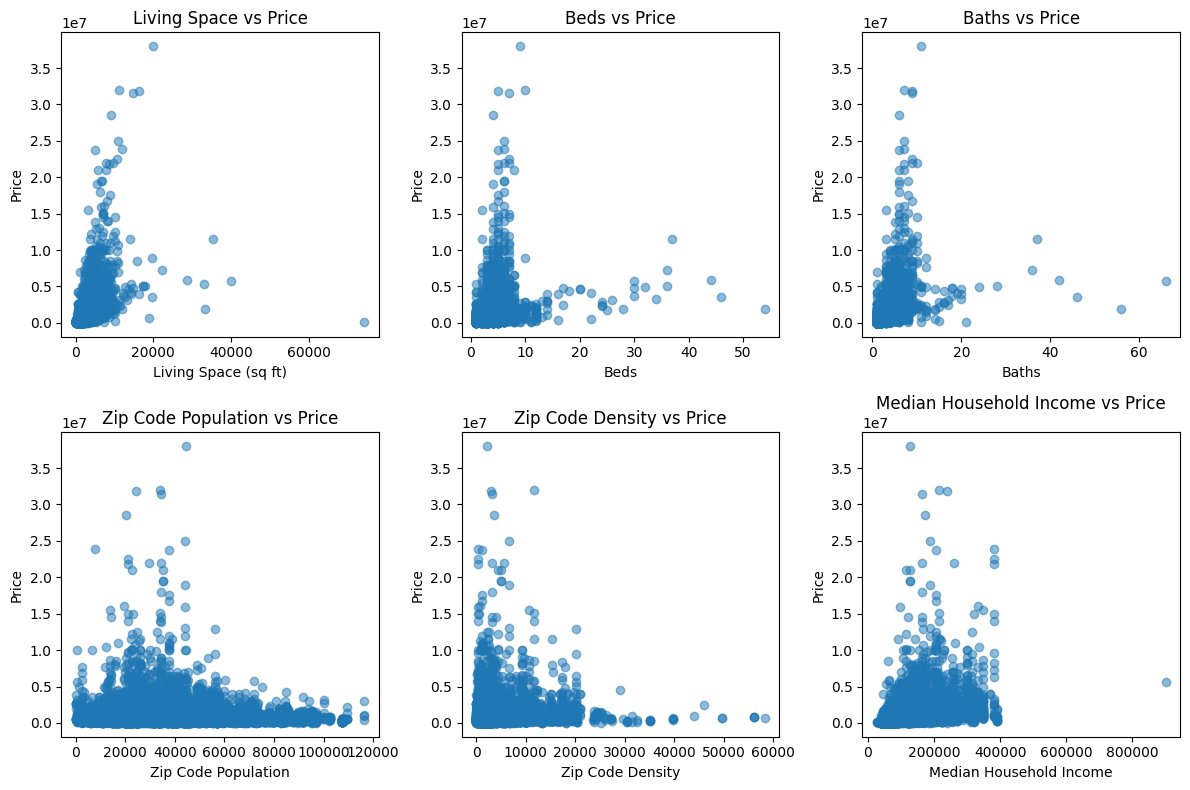

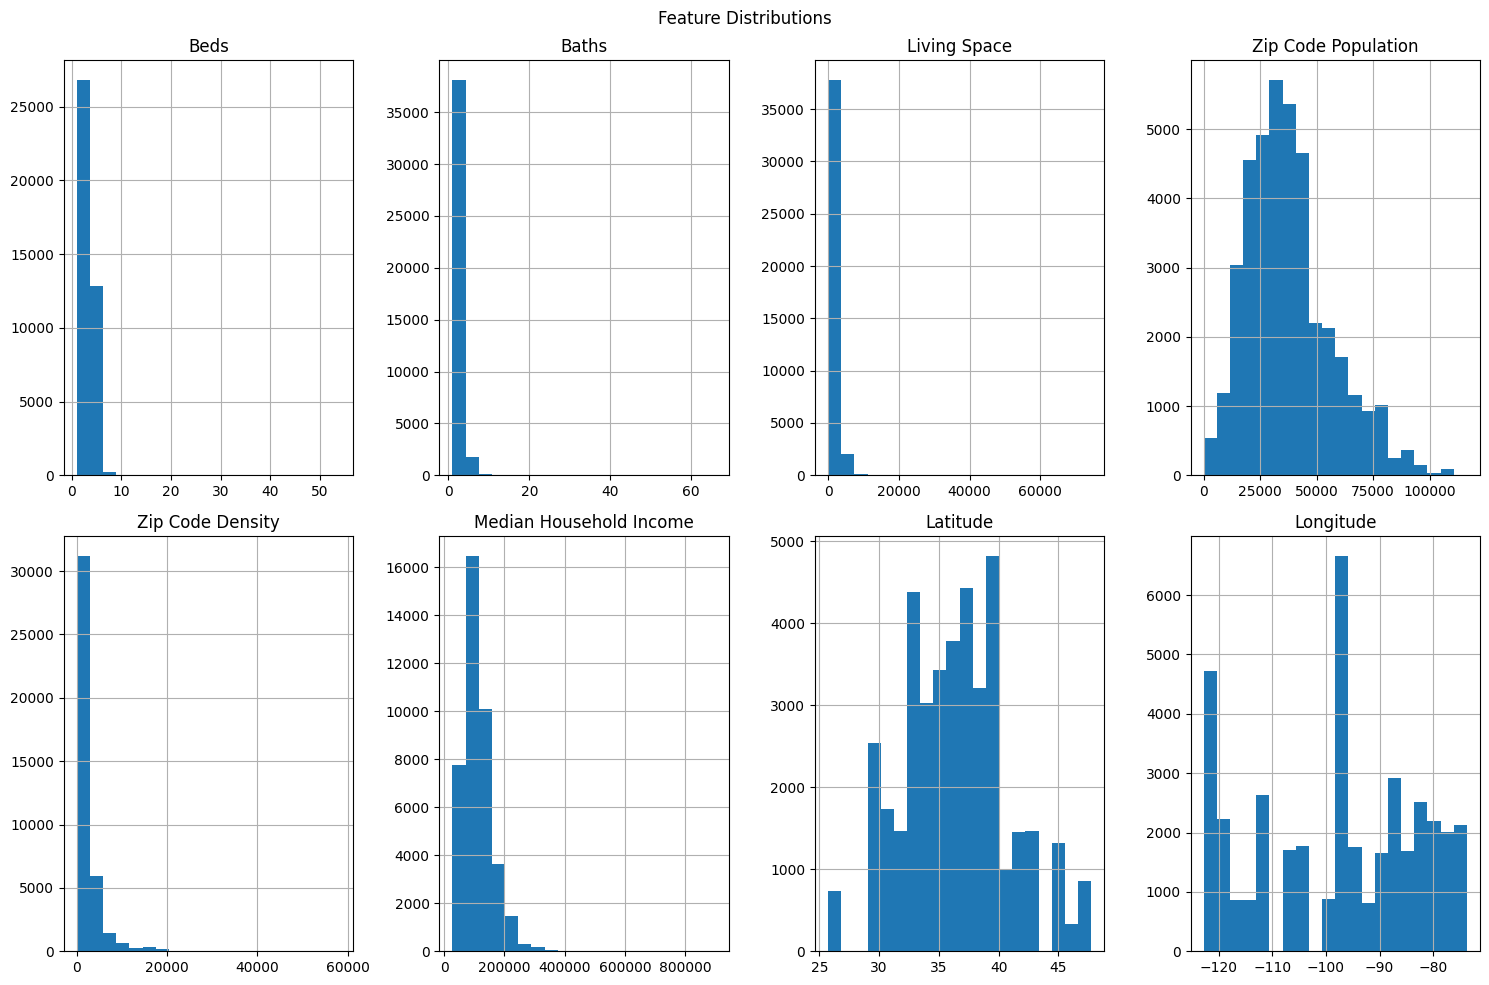

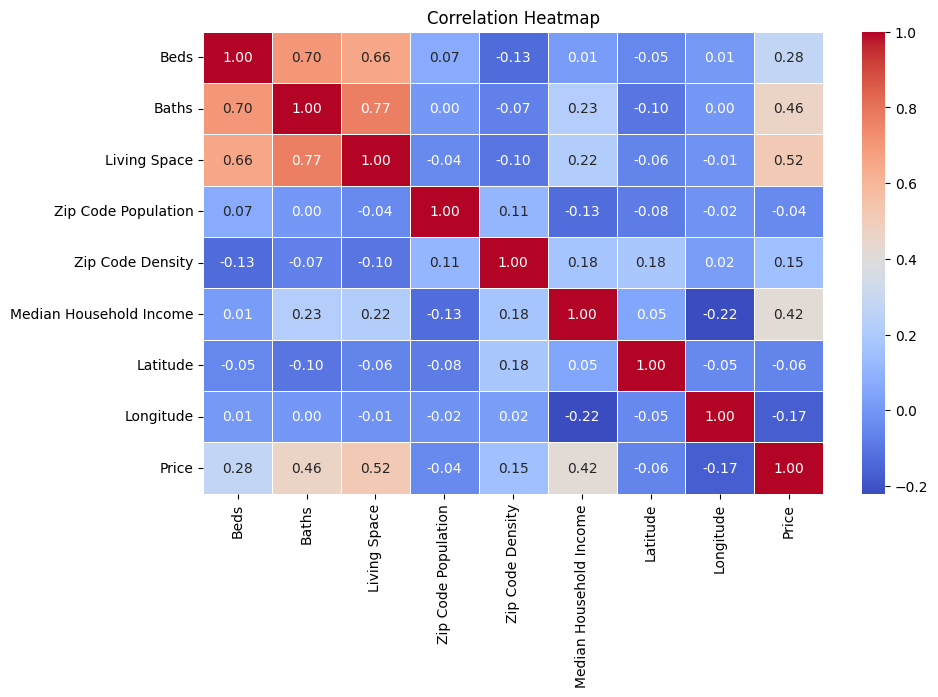

In [5]:
# Scatter plots to show relationship between features and price
plt.figure(figsize=(12, 8))

# Scatter plot for Living Space vs. Price
plt.subplot(2, 3, 1)
plt.scatter(df['Living Space'], df['Price'], alpha=0.5)
plt.xlabel('Living Space (sq ft)')
plt.ylabel('Price')
plt.title('Living Space vs Price')

# Scatter plot for Beds vs. Price
plt.subplot(2, 3, 2)
plt.scatter(df['Beds'], df['Price'], alpha=0.5)
plt.xlabel('Beds')
plt.ylabel('Price')
plt.title('Beds vs Price')

# Scatter plot for Baths vs. Price
plt.subplot(2, 3, 3)
plt.scatter(df['Baths'], df['Price'], alpha=0.5)
plt.xlabel('Baths')
plt.ylabel('Price')
plt.title('Baths vs Price')

# Scatter plot for Zip Code Population vs. Price
plt.subplot(2, 3, 4)
plt.scatter(df['Zip Code Population'], df['Price'], alpha=0.5)
plt.xlabel('Zip Code Population')
plt.ylabel('Price')
plt.title('Zip Code Population vs Price')

# Scatter plot for Zip Code Density vs. Price
plt.subplot(2, 3, 5)
plt.scatter(df['Zip Code Density'], df['Price'], alpha=0.5)
plt.xlabel('Zip Code Density')
plt.ylabel('Price')
plt.title('Zip Code Density vs Price')

# Scatter plot for Median Household Income vs. Price
plt.subplot(2, 3, 6)
plt.scatter(df['Median Household Income'], df['Price'], alpha=0.5)
plt.xlabel('Median Household Income')
plt.ylabel('Price')
plt.title('Median Household Income vs Price')

plt.tight_layout()
plt.show()

# Histograms to show the distribution of each feature
df[features].hist(bins=20, figsize=(15, 10), layout=(2, 4))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Data Processing
Splitting data into 80% training, 20% testing

In [6]:
df = df[features + [target]].copy()

# Handle missing values (replace with median)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Finding Average of data
This will be used for error analysis of each algorithm

In [7]:
average_price = df['Price'].mean()
print(f"The average house price in the dataset is: ${average_price:,.2f}")

The average house price in the dataset is: $622,777.12


#First Method: Linear Regression

In [9]:
lr = LinearRegression()


lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}")

Linear Regression - MSE: 648931898427.6188, MAE: 298758.7201413086, R²: 0.3984960432448301


## Plot Predicted vs Actual Prices

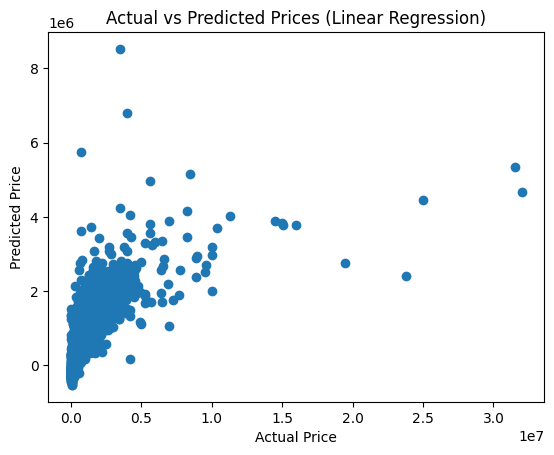

In [10]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()


## Plot predicted price based on the number of Bedrooms

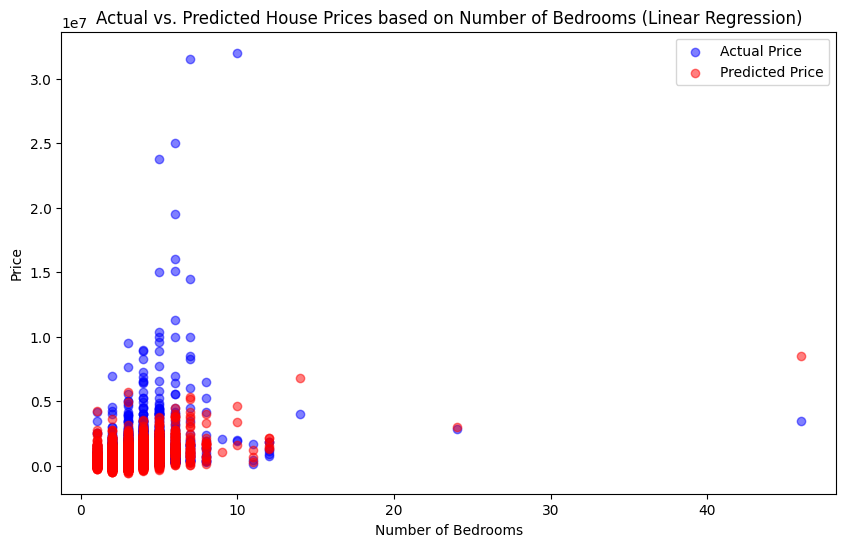

In [11]:
test_results_lr = X_test.copy()
test_results_lr['Actual Price'] = y_test
test_results_lr['Predicted Price'] = y_pred_lr

plt.figure(figsize=(10, 6))
plt.scatter(test_results_lr['Beds'], test_results_lr['Actual Price'], color='blue', alpha=0.5, label='Actual Price')
plt.scatter(test_results_lr['Beds'], test_results_lr['Predicted Price'], color='red', alpha=0.5, label='Predicted Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Actual vs. Predicted House Prices based on Number of Bedrooms (Linear Regression)')
plt.legend()
plt.show()


## Plot predicted price based on the number of Bathrooms

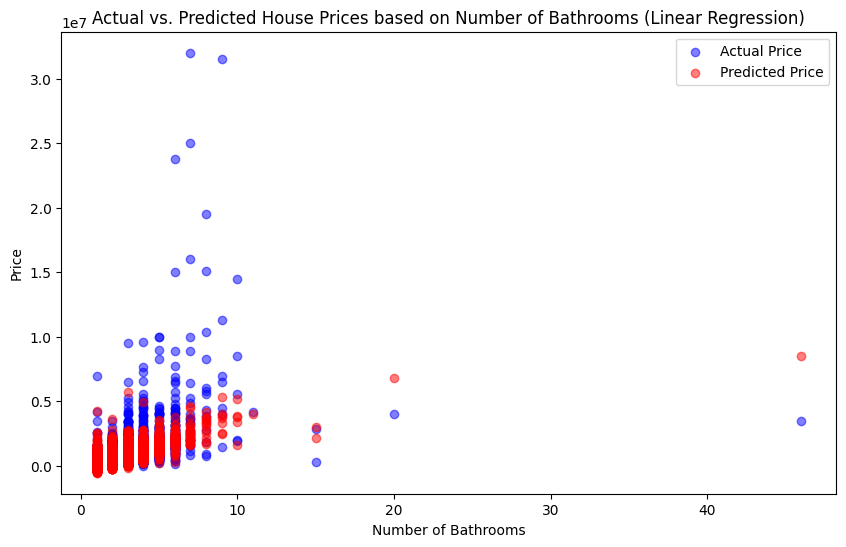

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(test_results_lr['Baths'], test_results_lr['Actual Price'], color='blue', alpha=0.5, label='Actual Price')
plt.scatter(test_results_lr['Baths'], test_results_lr['Predicted Price'], color='red', alpha=0.5, label='Predicted Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Actual vs. Predicted House Prices based on Number of Bathrooms (Linear Regression)')
plt.legend()
plt.show()


## Plot predicted price based on Latitude

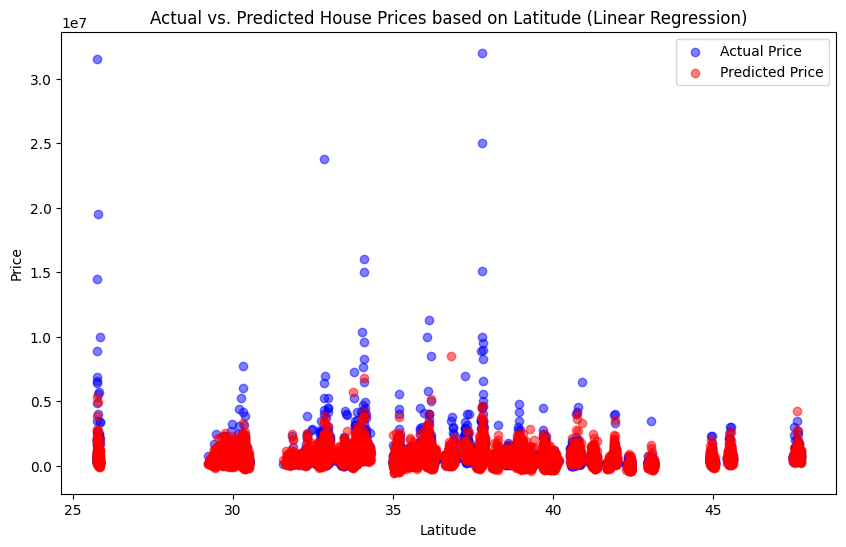

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_results_lr['Latitude'], test_results_lr['Actual Price'], color='blue', alpha=0.5, label='Actual Price')
plt.scatter(test_results_lr['Latitude'], test_results_lr['Predicted Price'], color='red', alpha=0.5, label='Predicted Price')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('Actual vs. Predicted House Prices based on Latitude (Linear Regression)')
plt.legend()
plt.show()


## Plot predicted price based on Living Space

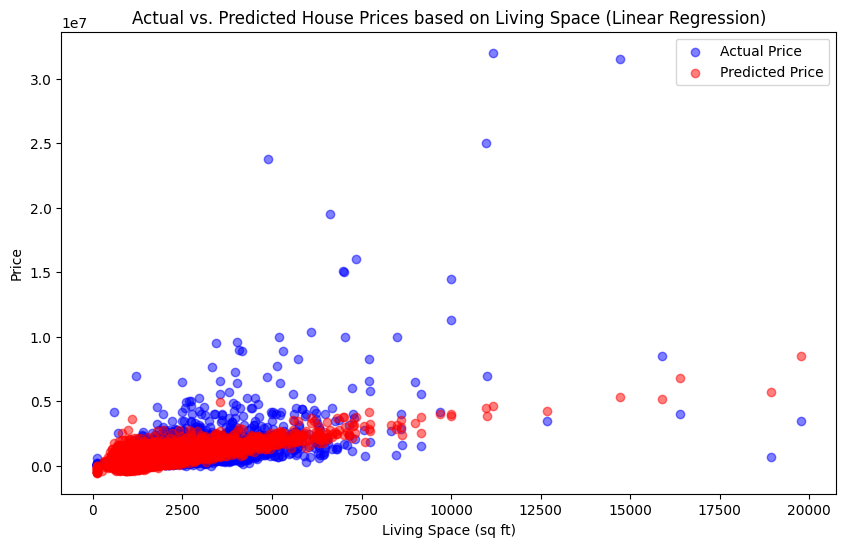

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_results_lr['Living Space'], test_results_lr['Actual Price'], color='blue', alpha=0.5, label='Actual Price')
plt.scatter(test_results_lr['Living Space'], test_results_lr['Predicted Price'], color='red', alpha=0.5, label='Predicted Price')
plt.xlabel('Living Space (sq ft)')
plt.ylabel('Price')
plt.title('Actual vs. Predicted House Prices based on Living Space (Linear Regression)')
plt.legend()
plt.show()


##Plot predicted price based on Median Household Income

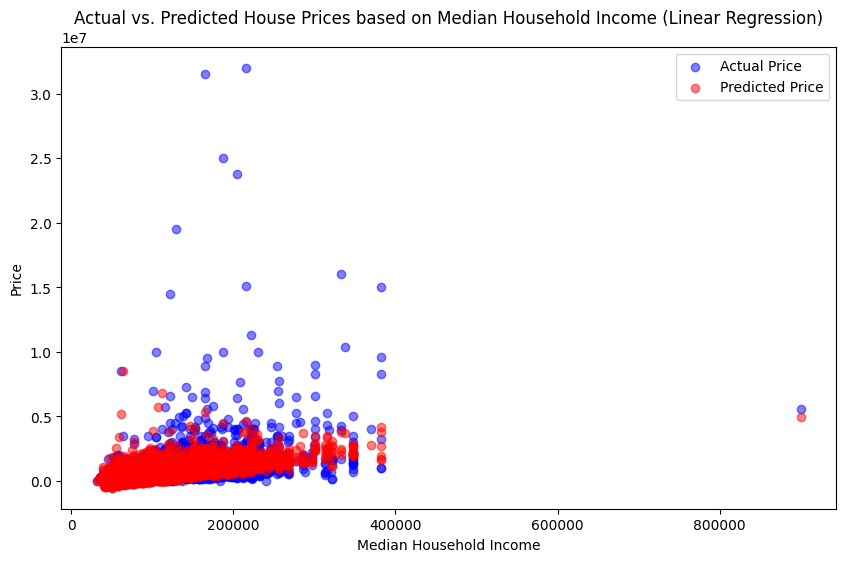

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_results_lr['Median Household Income'], test_results_lr['Actual Price'], color='blue', alpha=0.5, label='Actual Price')
plt.scatter(test_results_lr['Median Household Income'], test_results_lr['Predicted Price'], color='red', alpha=0.5, label='Predicted Price')
plt.xlabel('Median Household Income')
plt.ylabel('Price')
plt.title('Actual vs. Predicted House Prices based on Median Household Income (Linear Regression)')
plt.legend()
plt.show()


##Plot predicted price based on Zip Code Population

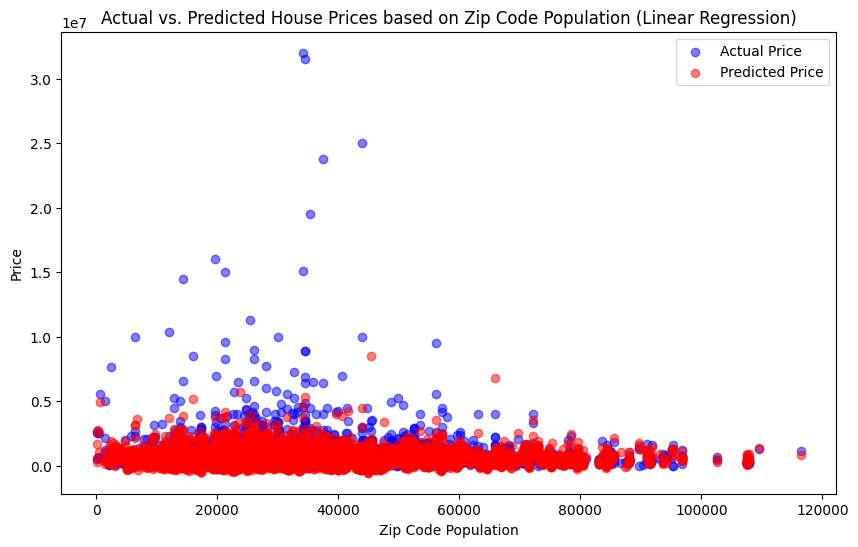

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_results_lr['Zip Code Population'], test_results_lr['Actual Price'], color='blue', alpha=0.5, label='Actual Price')
plt.scatter(test_results_lr['Zip Code Population'], test_results_lr['Predicted Price'], color='red', alpha=0.5, label='Predicted Price')
plt.xlabel('Zip Code Population')
plt.ylabel('Price')
plt.title('Actual vs. Predicted House Prices based on Zip Code Population (Linear Regression)')
plt.legend()
plt.show()


# Second Method: Random Forest Regressor Model

## Finding best parameters for Random Forest Regression Model
Im using GridSearchCV from sklearn.model_selection library to find the best possible parameters that can be used for the dataset.

I could of increased the size of parameteres to messure, but it would have taken much longer to get those parameters back.

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['squared_error']
}


rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Metrics
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred)}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.7290413247862626
Test MSE: 284725070284.19214
Test MAE: 150211.6044665805



##Instantiate the model with the best parameters

In [ ]:
# Instantiate the model with the best parameters
best_rf = RandomForestRegressor(
    bootstrap=True,
    criterion='squared_error',
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)


best_rf.fit(X_train, y_train)


y_test_pred = best_rf.predict(X_test)

# Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

Test MSE: 284725070284.19214
Test MAE: 150211.6044665805


## Plot  Predicted vs Actual Prices

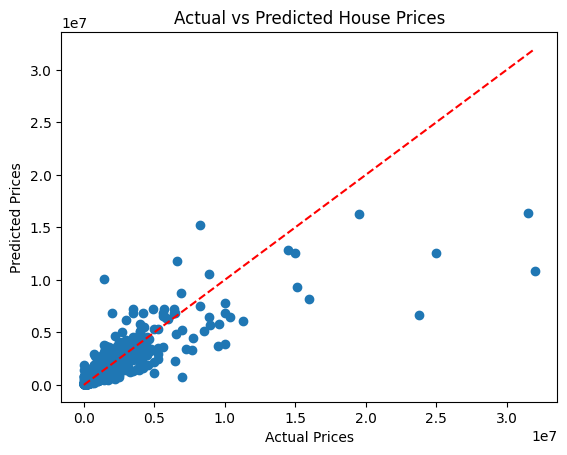

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

## Plot feature importance

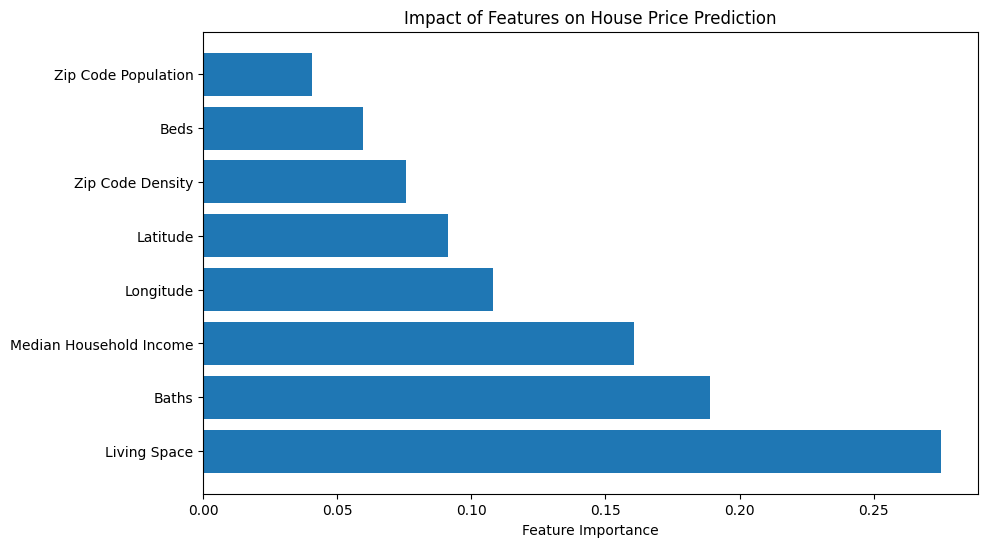

In [ ]:
feature_importances = best_rf.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[indices], feature_importances[indices])
plt.xlabel('Feature Importance')
plt.title('Impact of Features on House Price Prediction')
plt.show()

## Plot prediction that living space has on price

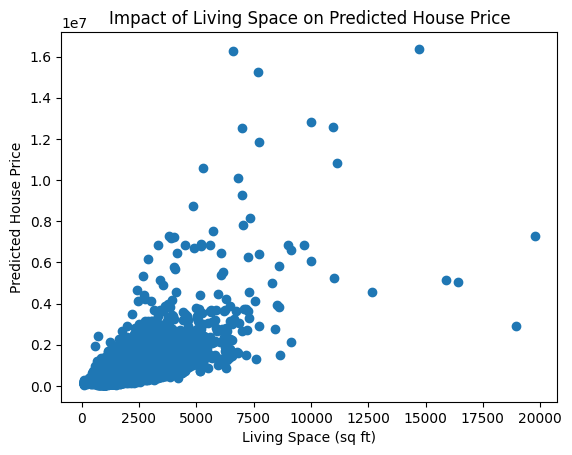

In [ ]:
plt.scatter(X_test['Living Space'], y_pred)
plt.xlabel('Living Space (sq ft)')
plt.ylabel('Predicted House Price')
plt.title('Impact of Living Space on Predicted House Price')
plt.show()


## Plot prediction that number of bedrooms has on price

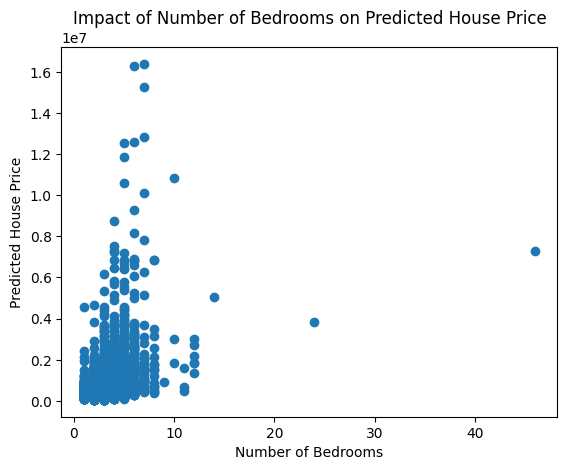

In [ ]:
plt.scatter(X_test['Beds'], y_pred)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Predicted House Price')
plt.title('Impact of Number of Bedrooms on Predicted House Price')
plt.show()



## Plot prediction that number of bathrooms has on price

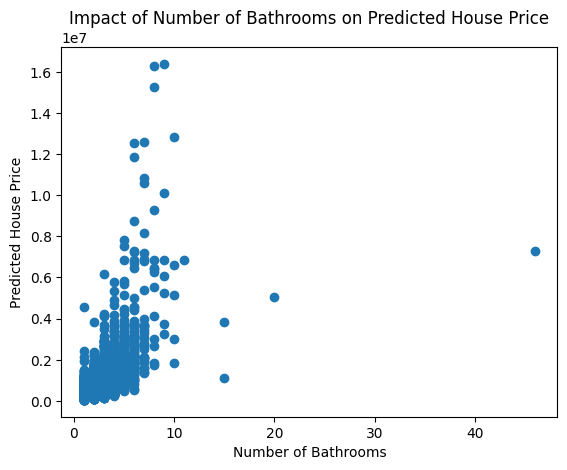

In [ ]:
plt.scatter(X_test['Baths'], y_pred)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Predicted House Price')
plt.title('Impact of Number of Bathrooms on Predicted House Price')
plt.show()


## Plot prediction that Median Household Income has on price

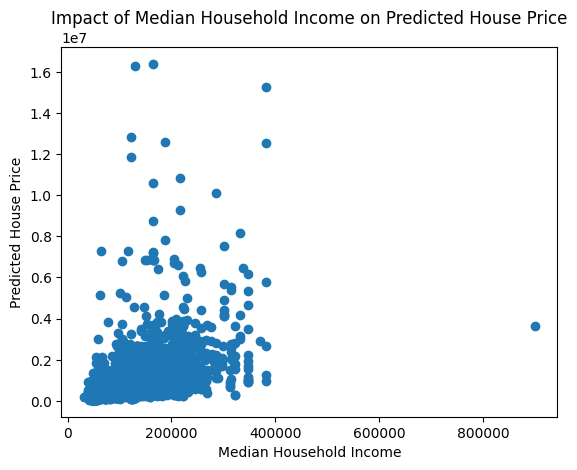

In [ ]:
plt.scatter(X_test['Median Household Income'], y_pred)
plt.xlabel('Median Household Income')
plt.ylabel('Predicted House Price')
plt.title('Impact of Median Household Income on Predicted House Price')
plt.show()


## Plot prediction that Zip Code Population has on price

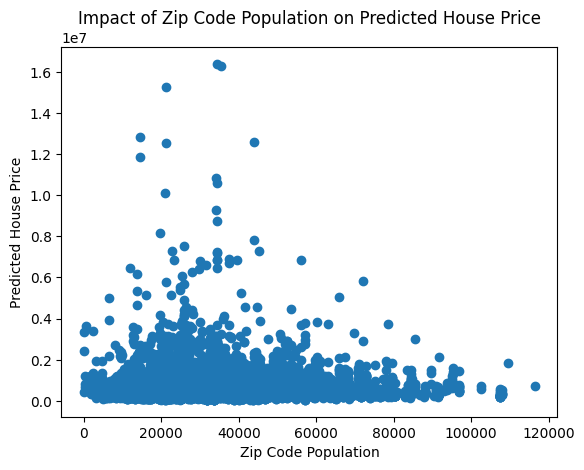

In [ ]:
plt.scatter(X_test['Zip Code Population'], y_pred)
plt.xlabel('Zip Code Population')
plt.ylabel('Predicted House Price')
plt.title('Impact of Zip Code Population on Predicted House Price')
plt.show()


## Plot prediction that Latitude has on price

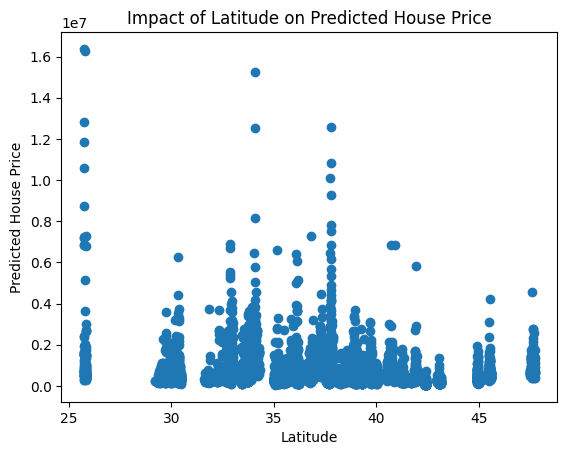

In [ ]:
plt.scatter(X_test['Latitude'], y_pred)
plt.xlabel('Latitude')
plt.ylabel('Predicted House Price')
plt.title('Impact of Latitude on Predicted House Price')
plt.show()
